In [1]:
import sys
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import datetime
from tqdm import tqdm
import GPy
from collections import defaultdict
from pathlib import Path
import seaborn as sns
import scipy.stats as stats
from matplotlib.colors import ListedColormap
import warnings
import time
from itertools import product

mpl.rcParams['legend.frameon'] = False
mpl.rcParams['figure.autolayout'] = True
# mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


def utkarshGrid():
    plt.minorticks_on()
    plt.grid(color='grey',
             which='minor',
             linestyle=":",
             linewidth='0.1',
             )
    plt.grid(color='black',
             which='major',
             linestyle=":",
             linewidth='0.1',
             )

In [2]:
import random
random.seed(3)

%run Classes.ipynb

[STATUS] Reference Saved
[STATUS] Skipping Tests


In [3]:
data = LightCurve("reference.csv")
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data.select_curve(phiRange = phi_range, mejdynRange = mejdyn_range, mejwindRange = mejwind_range)
data.selected
zBand = 900.0
data.extract_curve()
data.curve.head(2) # iobs goes from 0 --> 10 (11 rows)
# data.simple_plot(zBand)
# data.plot_viewingangle_simple()

wavelength                                             10.0    \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             30.0    \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             50.0    \
iobs                                                            
0           [4.1465e-07, 1.3883e-06, 1.7753e-07, 2.6052e-0...   
1           [1.5032e-07, 1.4652e-06, 1.9802e-07, 2.5081e-0...   

wavelength                                             70.0    \
iobs                                                            
0           [9.1683e-06, 4.4819e-05, 9.8855e-06, 1.1481e-0...   
1           [8.0978e-06, 4.489e-05, 1.0097e-05, 0.00090249...   

wavelength                                             90.0    \
iobs                                                            
0           [8.3714e-05, 0.00025517, 8.129e-05, 2.384e-05,...   
1           [8.3075e-05, 0.00025799, 8.0892e-05, 2.4247e-0...   

wavelength                                             110.0   \
iobs                                                            
0           [0.00028939, 0.00085966, 0.00025527, 0.0001117...   
1           [0.00029871, 0.00092469, 0.0002547, 0.0001111,...   

wavelength                                             130.0   \
iobs                                                            
0           [0.00060159, 0.0015886, 0.0007023, 0.0002723, ...   
1           [0.00058962, 0.0018025, 0.00070055, 0.00027331...   

wavelength                                             150.0   \
iobs                                                            
0           [0.00079509, 0.0030784, 0.00080502, 0.00050972...   
1           [0.00078938, 0.0032975, 0.00080607, 0.00048103...   

wavelength                                             170.0   \
iobs                                                            
0           [0.0008913, 0.00566, 0.0013939, 0.00056179, 0....   
1           [0.00088974, 0.0060483, 0.0013921, 0.00056177,...   

wavelength                                             190.0   ...  \
iobs                                                           ...   
0           [0.0008789, 0.0050446, 0.0013068, 0.00060908, ...  ...   
1           [0.00087734, 0.0050459, 0.0011036, 0.00063516,...  ...   

wavelength                                             9810.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9830.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00026573...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9850.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9870.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.768...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9890.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9910.0  \


[STATUS] Plotting for nph: [], mejdyn: [0.01], mejwind: [0.11], phi: [30], viewing_angle: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


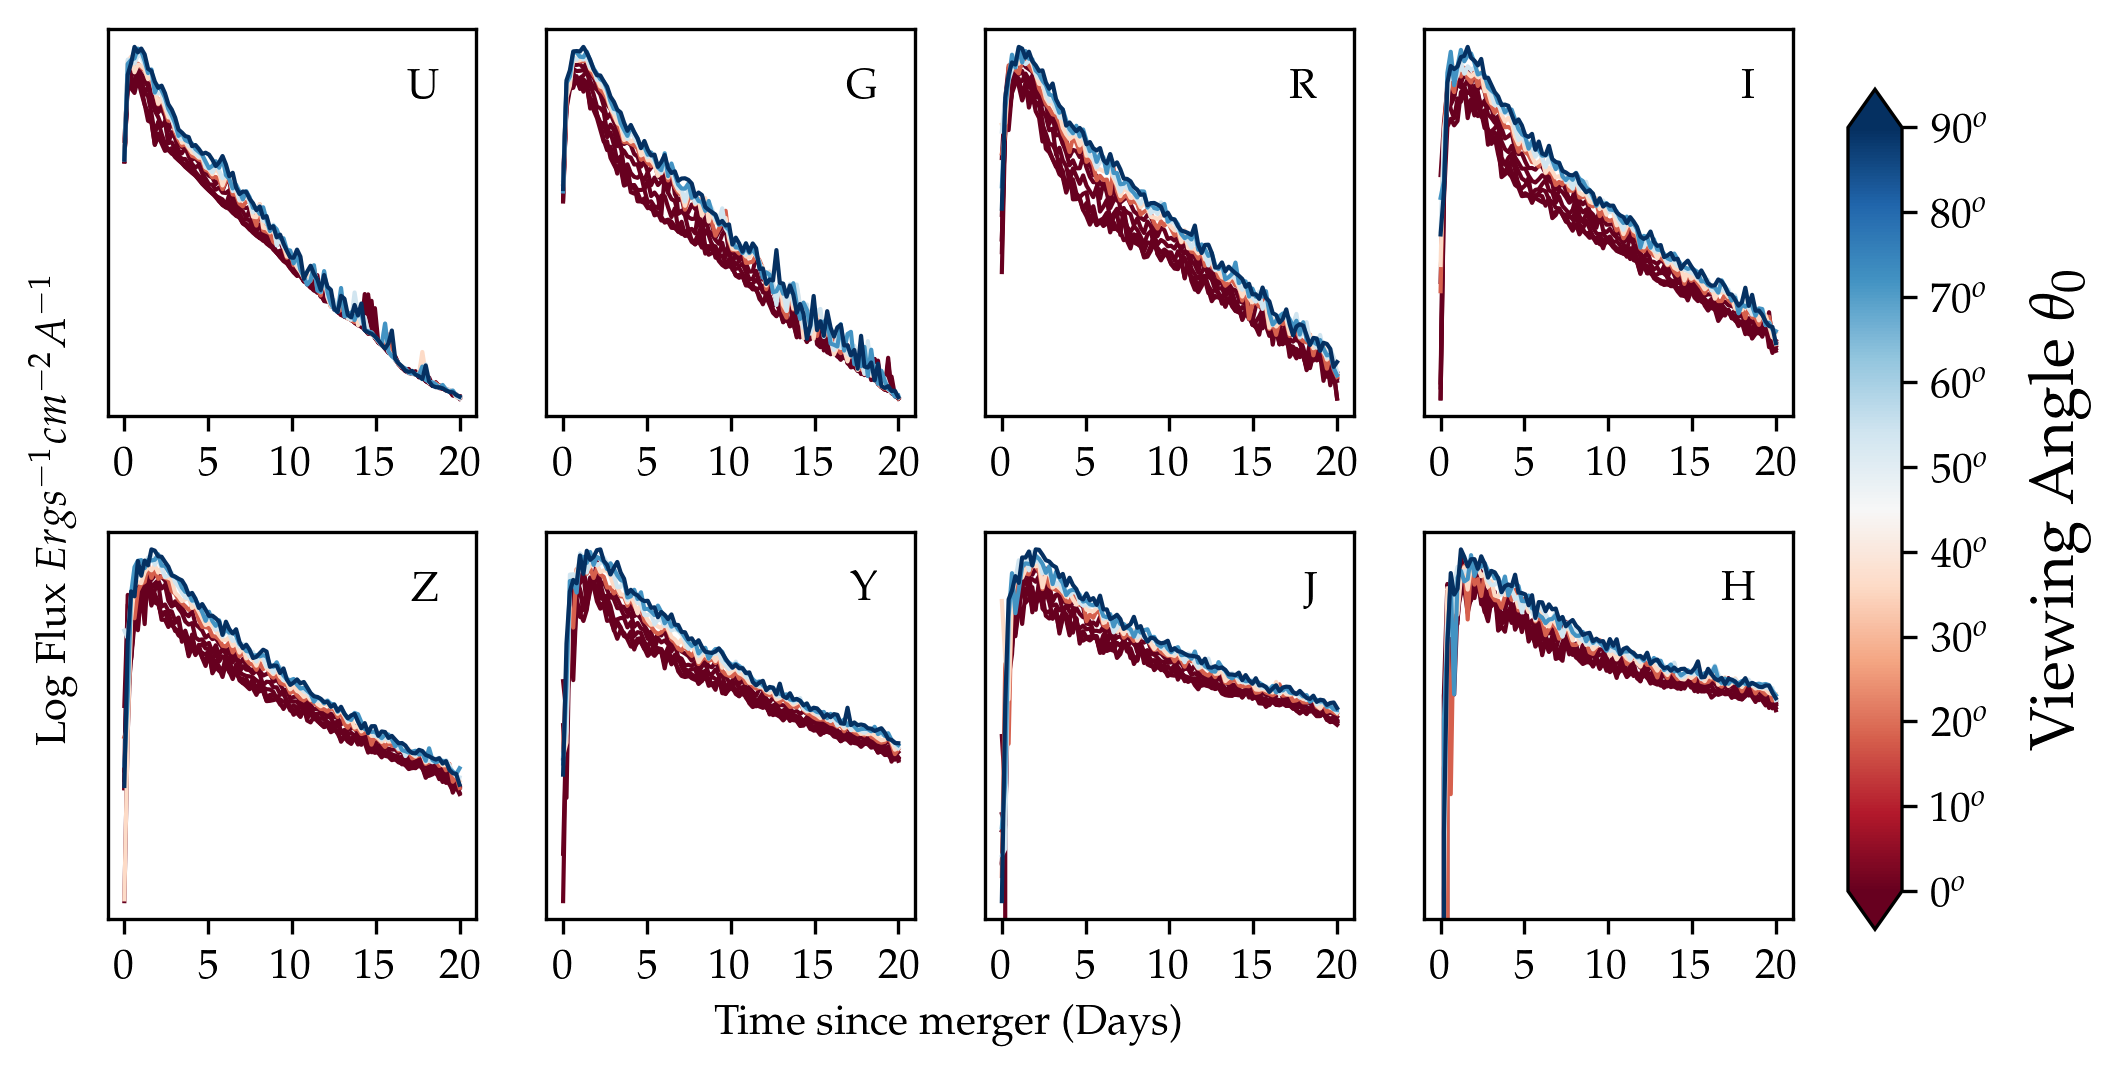

In [4]:
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data = LightCurve("reference.csv")
data.select_viewingangle(phi_range, mejdyn_range, mejwind_range)
data.plot_viewingangle()

In [5]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
phi_range = [45]
mejwind_range = [0.13]
# data.select_mejdyn(wv_range, iobs_range, phi_range, mejwind_range)
# data.mejdyn
# data.plot_mejdyn(verbose = True)

In [6]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
mejdyn_range = [0.01]
phi_range = [45]
# data.select_mejwind(wv_range, iobs_range, phi_range, mejdyn_range)
# data.mejwind
# data.plot_mejwind(verbose = True)

In [7]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
mejdyn_range = [0.01]
mejwind_range = [0.11]
# data.select_phi(wv_range, iobs_range, mejwind_range, mejdyn_range)
# data.plot_phi(verbose = True)

# Gaussian Process Script

In [8]:
gp = GP("reference.csv")
phi_range = [15]
mejdyn_range = [0.01]
mejwind_range = [0.05]
wv = 1500
gp.range_select_wavelength(phi_range, mejdyn_range, mejwind_range, wv)
# gp.viewingangle

In [9]:
gp.single_time_step(1) # Want distribution at 1 day
gp.time_sliced
# gp.time_sliced_normed
# arr = gp.time_sliced.to_numpy()[0]
# plt.scatter(np.linspace(0,gp.Nobs,len(arr)), arr)

iobs             0         1         2         3         4         5   \
time_step                                                               
5          0.000109  0.000227  0.000183  0.000473  0.001095  0.000828   

iobs             6         7         8         9         10  
time_step                                                    
5          0.001256  0.000556  0.001347  0.000678  0.001556

In [10]:
gp.normedDF()

In [11]:
gp.setXY_viewingangle()
gp.set_kernel(GPy.kern.RBF(input_dim=1, variance = 2, lengthscale=2))
gp.set_model(GPy.models.GPRegression(gp.X, gp.Y, gp.kernel))

In [12]:
gp.set_predX(np.linspace(0,gp.Nobs,100).reshape(100, 1))

# # Manual
# gp.plot_prior(manual = True, sig = 2)
# gp.plot_covariance()
# cov1 = gp.cov

# # Automatic
# gp.plot_prior(manual = False, title = "Untrained Posterior")
# gp.plot_covariance()
# cov2 = gp.cov

# # Comparison
# print(f"Are covariance matricies equal? {np.allclose(cov1, cov2)}")
# plt.show()


Name : GP regression
Objective : 10.659139045542842
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |  0.38781063166209034  |      +ve      |        
  rbf.lengthscale          |    4.678911133662112  |      +ve      |        
  Gaussian_noise.variance  |   0.2657633178090892  |      +ve      |        


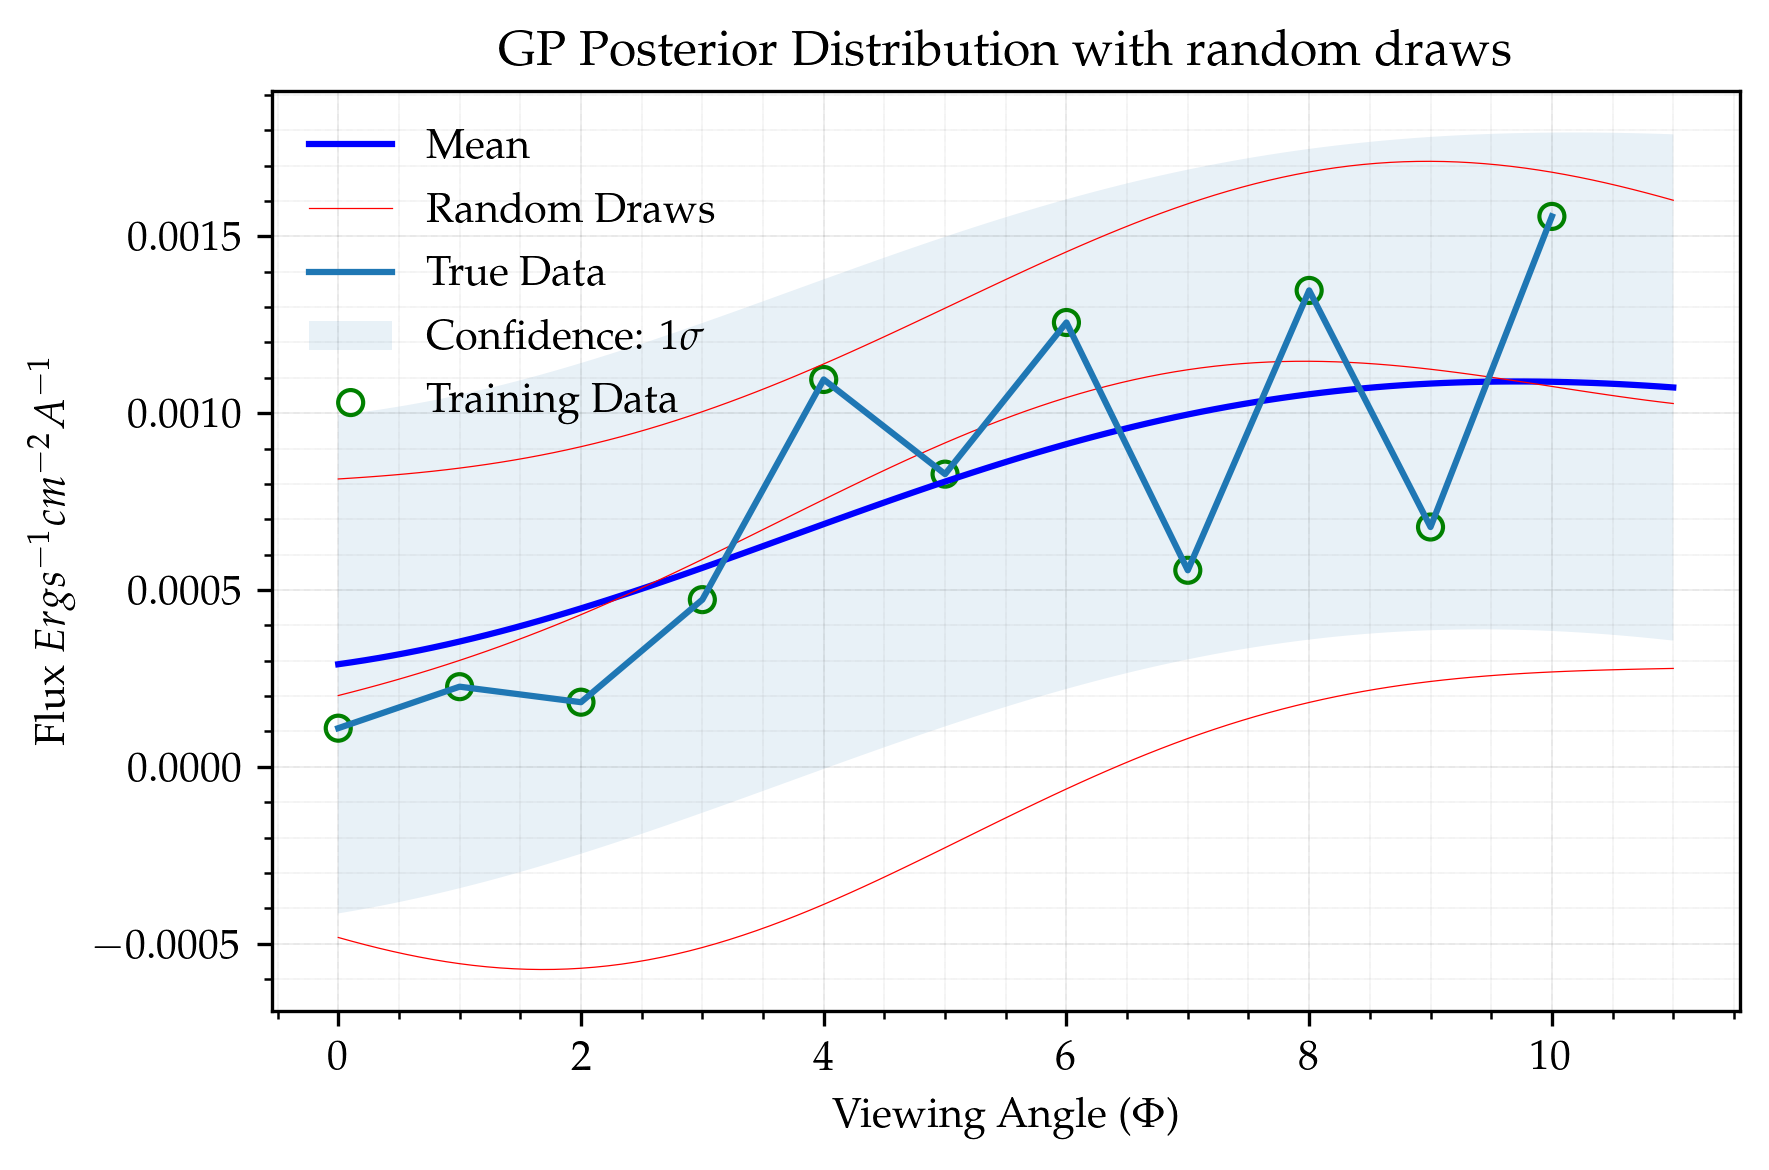

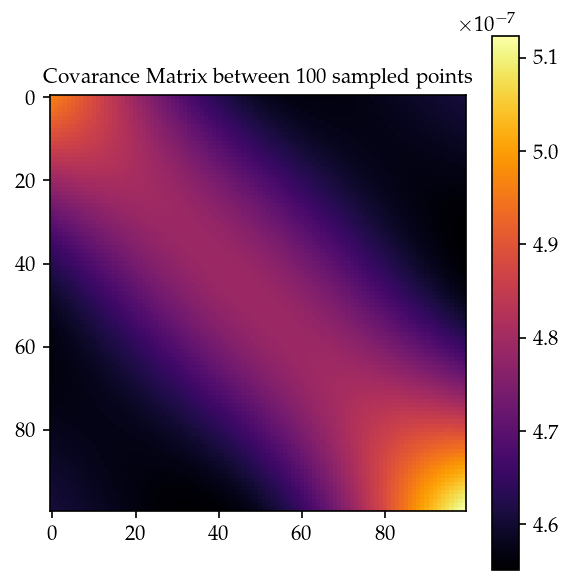

In [13]:
gp.model_train(verbose = True)

# # Manual
# gp.plot_posterior(manual = True)
# gp.plot_covariance()
# cov1 = gp.cov

# Automatic
gp.plot_posterior(manual = False, include_like = False)
plt.plot(gp.X.T[0], gp.time_sliced.to_numpy()[0], label = "True Data")
plt.legend()
gp.plot_covariance()
cov2 = gp.cov
# Comparison
# print(f"Are covariance matricies equal? {np.allclose(cov1, cov2)}")
# plt.show()

# LOO Cross Validation

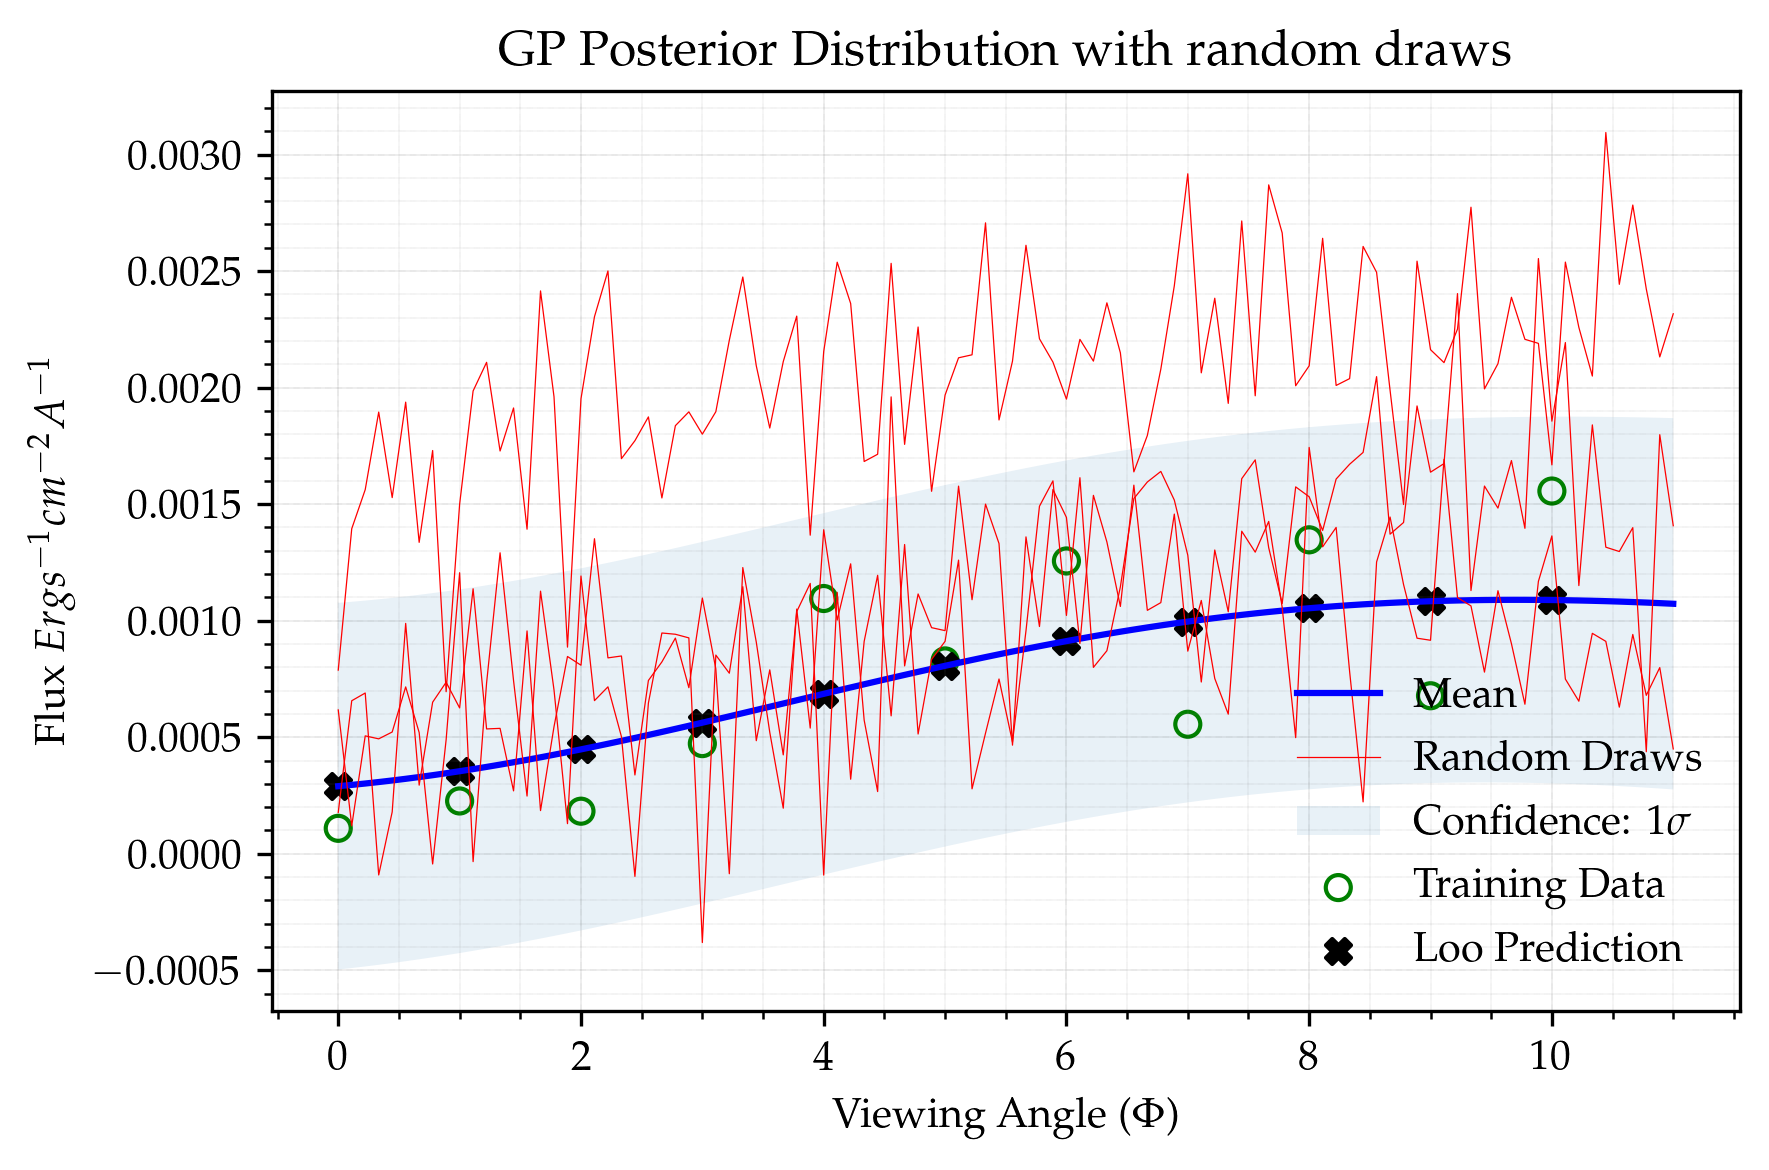

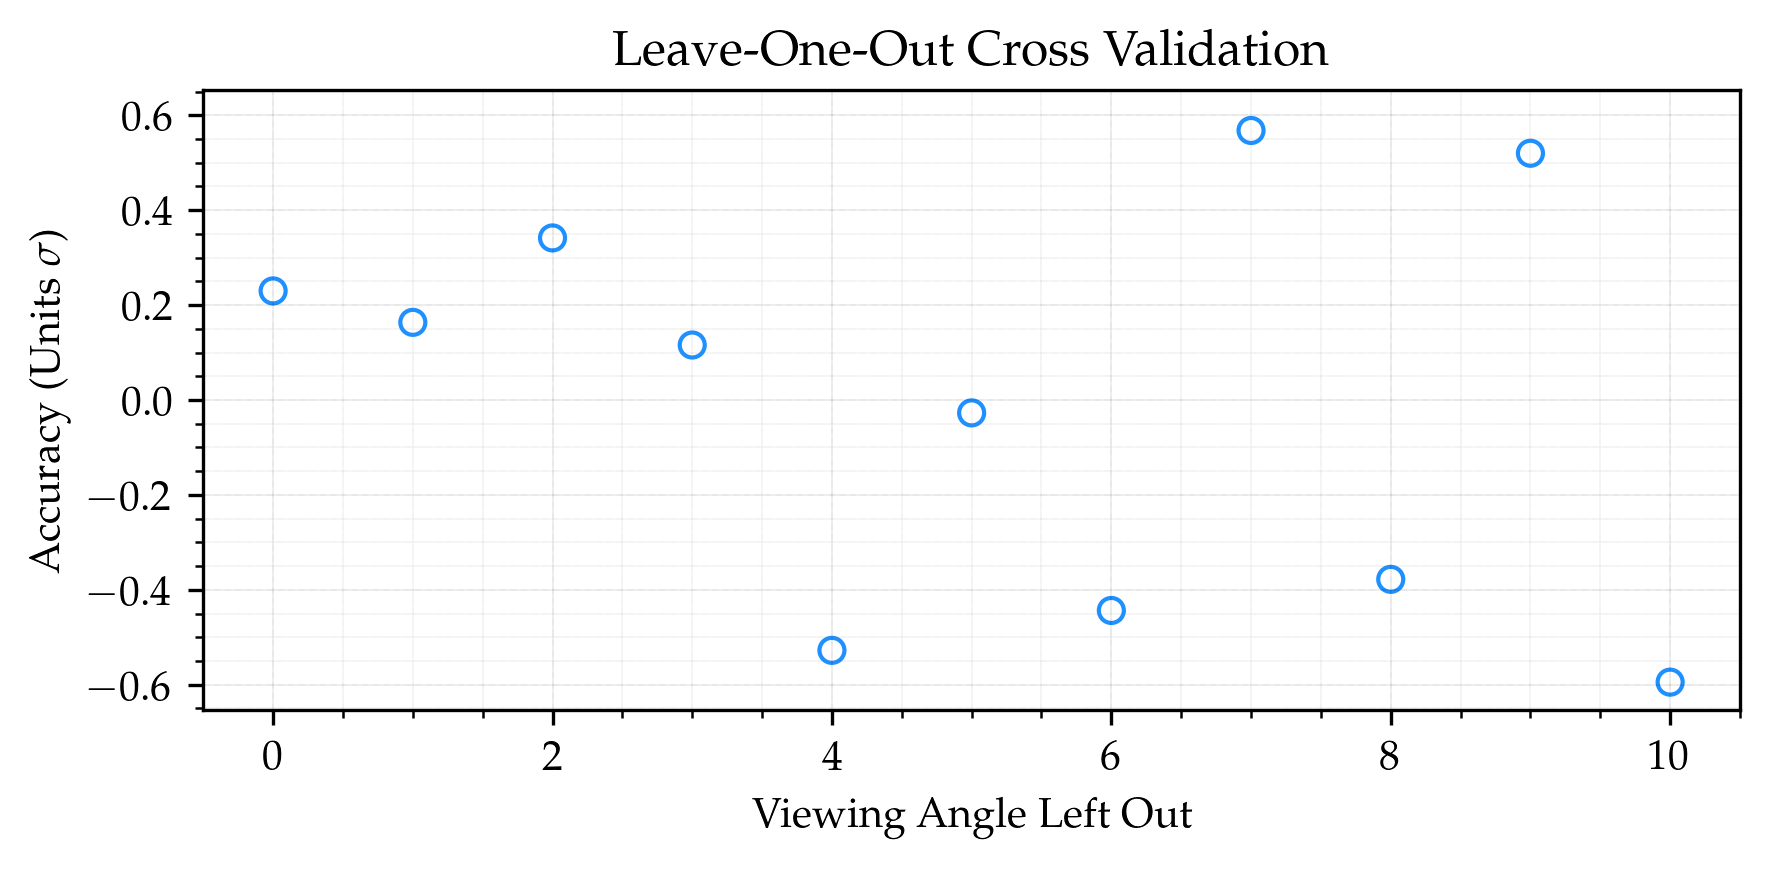

In [14]:
gp.LOOCV()
gp.plot_loocv_simple()
gp.plot_loocv()
# gp.LOOCV(manual = False)

# Multiple GP LOO-CV

In [15]:
gp0 = GP("reference.csv")
gp0.multiple_LOOCV(N = 1, verbose = True)
gp0.loo_list_multiple.shape

100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


(1, 11)

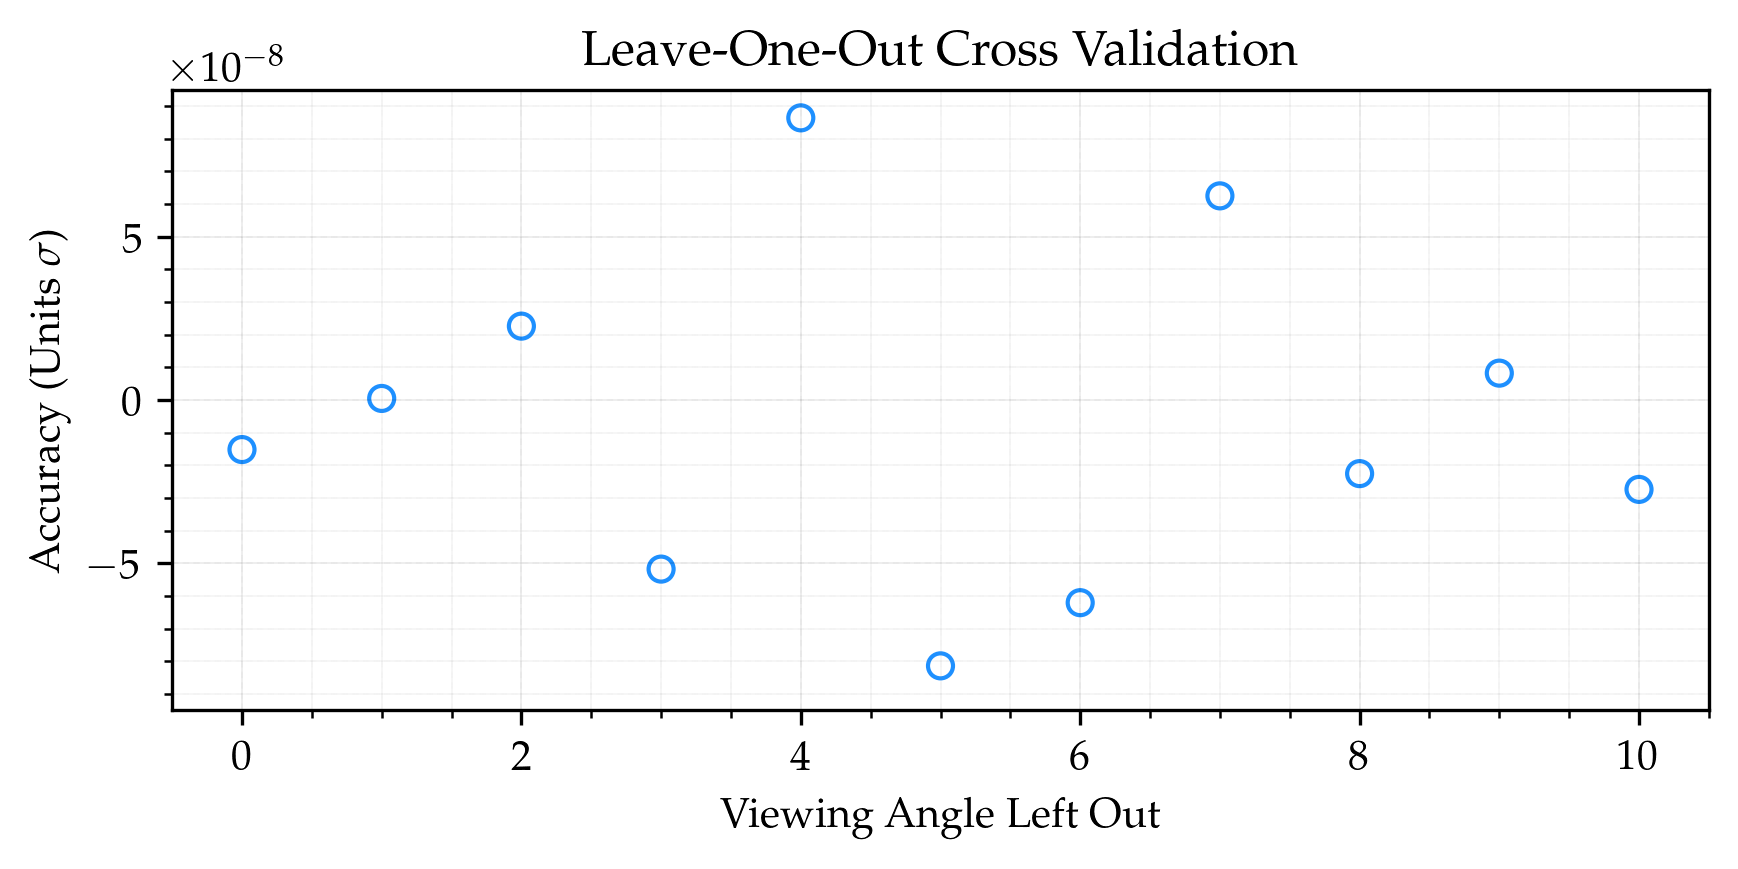

In [16]:
gp0.plot_loocv(plot_type = "multiple")

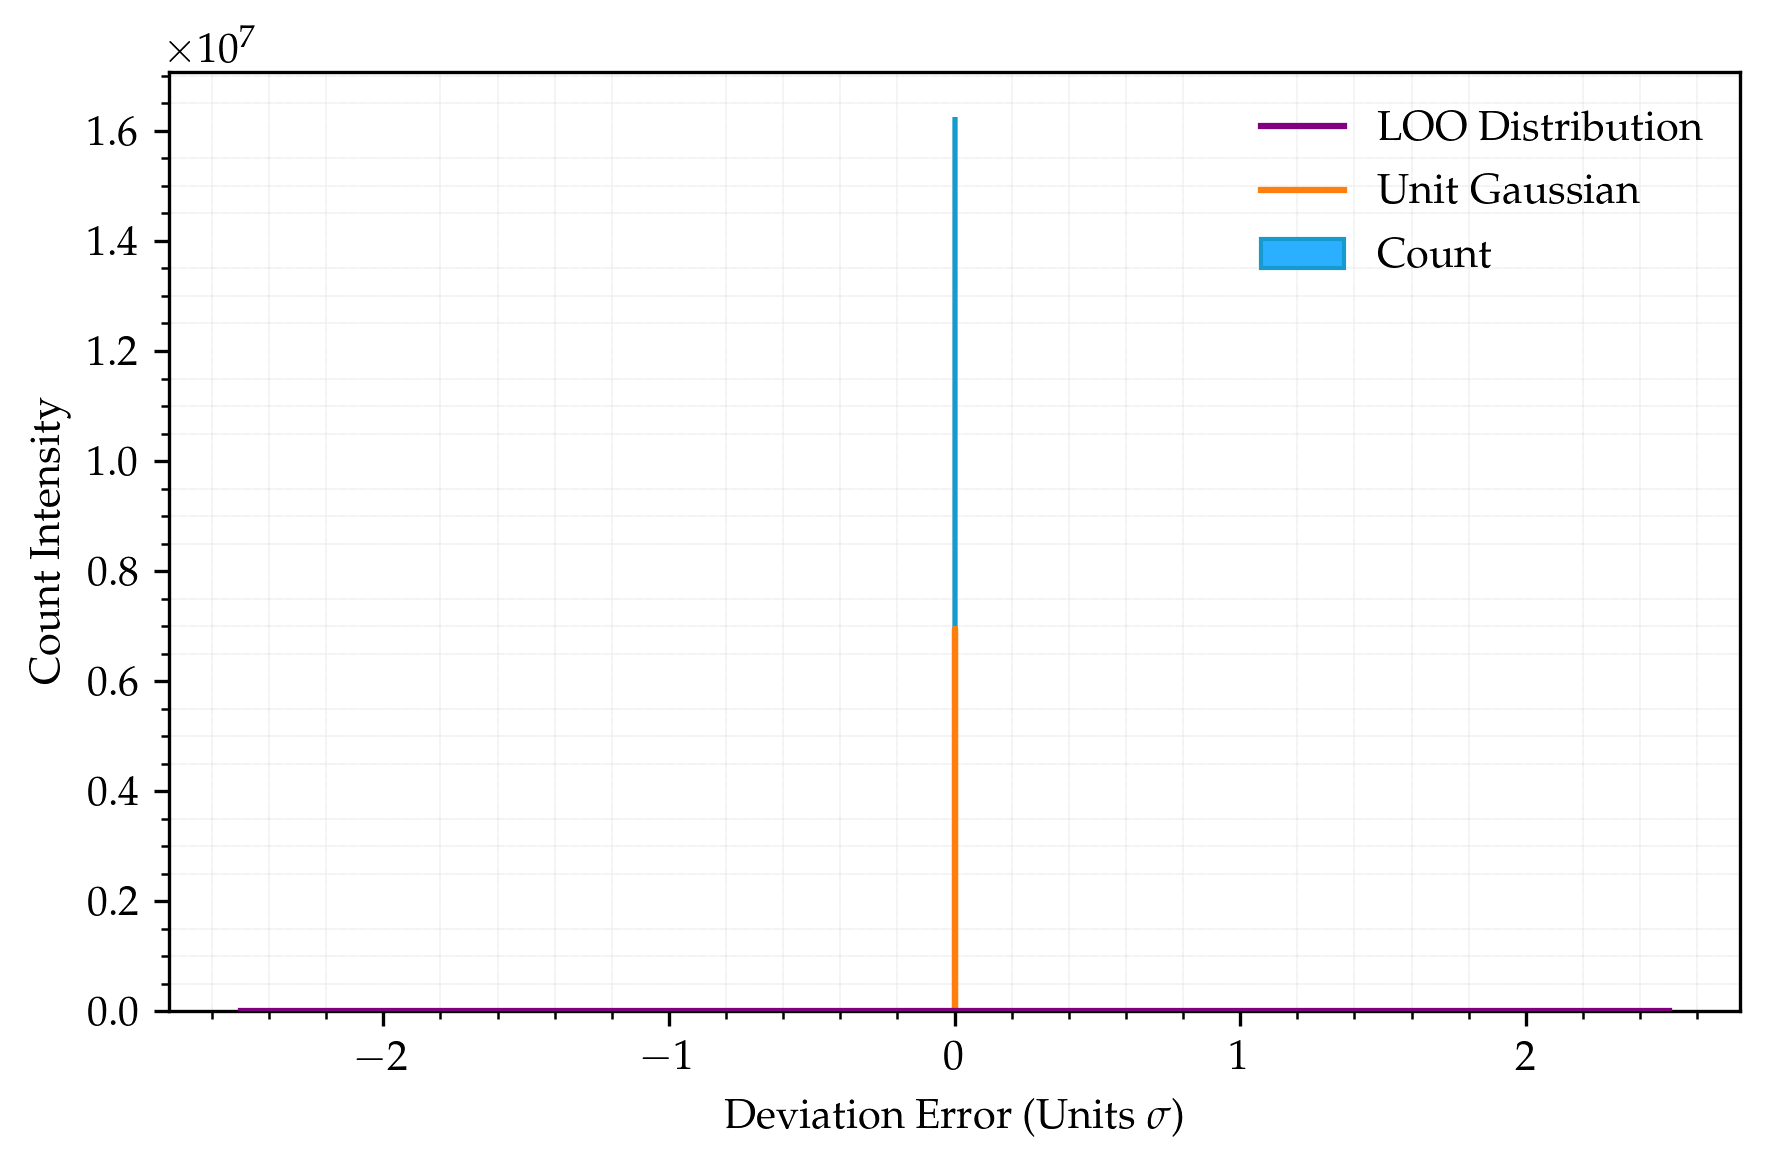

In [17]:
gp0.plot_loocv_histogram()

# Multi-Dimensional Gaussian Process

In [18]:
# gp = GP2D("reference.csv")
# phi_range = [45]
# mejwind_range = []
# mejdyn_range = [0.01]
# wv_range = [900]
# gp.set_selection_range(typ = "mejwind", phi_range = phi_range, 
#                        mejwind_range = mejwind_range, mejdyn_range = mejdyn_range,
#                       wv_range = wv_range, verbose = True)
# gp.log_trainingND()
# gp.normalize_training2D()
# # display(gp.training2D)
# gp.setXY()
# gp.set_kernel(GPy.kern.RBF(input_dim=2, variance = 1, lengthscale=10))
# gp.set_model(GPy.models.GPRegression(gp.X,gp.Y,gp.kernel))
# gp.model_train(verbose = True)
# gp.model_predict(N = 20, make_cov = True, include_like = True)
# gp.unnormalize_training2D()

In [19]:
# gp.plot_covariance2D()

In [20]:
# gp.model.plot() # GPy Plotting
# gp.plot_posterior2D(verbose = True, lev = 20) # My Plotting

# 2D-LOOCV

In [21]:
# gp0 = GP2D("reference.csv")
# phi_range = [45]
# mejwind_range = [0.03]
# mejdyn_range = [0.01]
# wv_range = [900]
# gp0.set_selection_range(typ = "mejwind", phi_range = phi_range, 
#                        mejwind_range = mejwind_range, mejdyn_range = mejdyn_range,
#                       wv_range = wv_range, verbose = False)
# # display(gp0.selected)
# gp0.LOOCV_2D(verbose = True)

# Cross Validation LOO-CV 2D Histogram

In [ ]:
gp = GP2D("reference.csv")
typ = "mejwind"
gp.phi_range = [45]
gp.mejdyn_range = [0.01]
gp.mejwind_range = [0.05]
gp.wv_range = [900]

gp.multiple_LOOCV_2D(typ, verbose = 1, include_like = True, empirical = False)

  4%|▎         | 1/28 [00:04<02:10,  4.85s/it]

0.0004998225958826937 0.00071718 0.6969276832631888
0.00087748476986902 0.00033809 2.5954176990417346
0.0009107914473635537 0.00032512 2.801400859262899
0.000965070698567127 0.00031099 3.103220999283344
0.001229759377877075 9.8942e-05 12.429093588941754
-0.000907551736015297 0.0022909 -0.3961551076063107
-0.000857731085982719 0.0022875 -0.37496440917277335
0.0013619311638912136 9.916e-05 13.734682975909777
0.0013666093690065124 0.00010868 12.574616939699231
0.000728686057958311 0.00074599 0.9768040562987587
0.0004042568029603937 0.0010598 0.3814463134179974
5.291266552267301e-05 0.0011642 0.045449807183192754
0.00020430691930129223 0.0010114 0.20200407287056776
-0.0001277373324033266 0.0013638 -0.09366280422593239
0.00034621815734009963 0.00093001 0.37227358559596097
0.0008890833933419542 0.0004398 2.0215629680353664
0.00030534400564400277 0.0010782 0.28319792769801777
0.0007533567961874703 0.00067662 1.11341195381081
-0.00015749316572913363 0.0016188 -0.09729007025520979
-9.5395347659

  7%|▋         | 2/28 [00:09<02:05,  4.83s/it]

-0.0013648881755568346 0.0042258 -0.32298929801619447
-0.001607853318558651 0.0043906 -0.3662035527168613
-0.000448151895973508 0.0032712 -0.13699923452357177
-0.0005603945366338945 0.00357 -0.156973259561315
0.00022922961896642982 0.0031112 0.0736788438436712
-5.281081141853428e-05 0.0038328 -0.013778650443157557
-0.0009075032375695843 0.0051734 -0.17541717972118612
0.0005622255338246394 0.0041619 0.13508866955588542
0.00022902311917575094 0.0048584 0.04713961781157396
-0.0007772733841014037 0.0060879 -0.12767512345823742
0.00024494055248312687 0.0051334 0.04771507236590308
0.0019163654127657662 0.0009399 2.0389035139544274
0.001627592541287567 0.0011495 1.415913476544208
0.001859081400030734 0.0009573 1.9420050141342673
0.0016011903724300373 0.0014008 1.1430542350300095
0.0017019115804948824 0.0016301 1.0440534816851006
0.0018038965751012346 0.0019671 0.9170334884353794
0.0019407306503822401 0.0023159 0.8380027852593981
0.0020115336438177606 0.0027034 0.7440754767395726
0.00300526144

 11%|█         | 3/28 [00:14<01:58,  4.73s/it]

4.7653871117601596e-05 0.0024189 0.019700637115052957
-0.0007909220144237217 0.0033286 -0.23761401623016332
-0.0011483214400492899 0.0038176 -0.30079668903219037
0.0005329037172308372 0.0023221 0.22949214815504806
0.00028252420902220073 0.0027974 0.10099528455787544
0.0006649442152466111 0.0026572 0.2502424413843937
0.0009387820528562805 0.0026173 0.35868339619313055
-0.0006344846596177431 0.0043913 -0.1444867487117125
-0.002978899487196843 0.0068834 -0.43276570985223045
-0.0014218333545435178 0.0054096 -0.26283521046722824
0.0007977277687360083 0.0032075 0.24870702065035333
0.00021631430180431678 0.0022513 0.09608417439004877
-0.0005679028549090328 0.0031068 -0.18279350293196628
0.0005910332693112312 0.0020796 0.28420526510445815
-0.00026934085230444953 0.0031258 -0.0861670139818445
-0.00039586345686301247 0.0034773 -0.11384219275386434
0.00028806464113077844 0.0030356 0.09489545431900727
-0.0019186385270271353 0.0054762 -0.3503594695276169
-0.00025469096625668503 0.0040129 -0.0634680

 14%|█▍        | 4/28 [00:18<01:53,  4.73s/it]

0.0007882806306996734 0.0017435 0.4521253975908652
0.0009952503109695646 0.0016323 0.6097226679958124
0.0009472129577991195 0.0018672 0.5072905729429732
0.0005332239333385343 0.0025576 0.20848605463658673
0.0008279039793661082 0.0026184 0.31618697653762157
0.0004060746254890813 0.0034558 0.11750524494735844
0.00014790019136196562 0.0041638 0.03552048401987743
0.0004785420548110639 0.0042872 0.11162111746852582
0.0009261460088546454 0.0042669 0.21705360070651888
0.0015472681208821256 0.0040179 0.38509373575303657
0.00023002286163761182 0.0056292 0.04086244255624455
0.0015093332825809494 0.0010206 1.478868589634479
0.0013939166864790603 0.0012316 1.1317933472548394
0.0017140162863971407 0.0010982 1.5607505794911134
0.0020122955437419767 0.0010762 1.869815595374444
0.0020276821978998157 0.0014162 1.4317767249680946
0.0021992030132327294 0.0016602 1.324661494538447
0.0025377253204236006 0.0017715 1.4325291111620664
0.0024714109868343432 0.0022919 1.078324092165602
0.0024312036902831282 0.0

 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply
 <ipython-input-2-f064fdaaae8c>:399: RuntimeWarning:divide by zero encountered in true_divide
 <ipython-input-2-f064fdaaae8c>:401: RuntimeWarning:divide by zero encountered in double_scalars
 18%|█▊        | 5/28 [00:23<01:47,  4.68s/it]

-0.00020864616338875743 0.0012176 -0.17135854417604912
-0.0003200599971146244 0.0012527 -0.2554961260594112
-0.00036568131940378453 0.0012163 -0.3006505955798607
-0.000290285342685332 0.0010796 -0.2688823107496591
-0.00035302635089966034 0.0011369 -0.3105166249447272
-0.0006451576871418014 0.0014926 -0.43223749641015774
-0.00029803562436587485 0.0012618 -0.23619878298135588
-0.0006543768824543328 0.0017468 -0.3746146567748642
-0.0007456183517763532 0.0019316 -0.38601074330935664
-0.0005653256827978733 0.0017805 -0.3175095101364074
-0.0015828907061076558 0.002768 -0.5718535787961184
0.00011189450449204576 0.00088671 0.12619064236565028
7.611264387788149e-05 0.00085672 0.08884191320137441
-0.00010766329361268465 0.00095853 -0.11232125610328801
-0.000219898803520136 0.0010095 -0.21782942399221003
-0.00028022420825979204 0.0010644 -0.2632696432354303
-0.00022916239987553968 0.0010769 -0.21279821698907947
-0.00031756165676244885 0.0012816 -0.24778531270478218
-0.00036972871626230895 0.00146

 21%|██▏       | 6/28 [00:27<01:41,  4.62s/it]

-0.0001512720965973146 0.001524 -0.09925990590374974
-0.00041439286632728224 0.0018621 -0.22254060809155374
-0.00014331652665972873 0.0018565 -0.07719715952584365
-0.00039587311498276087 0.0025548 -0.15495268317784597
0.00044150494602745354 0.0023018 0.1918085611380022
0.0012393001429567402 0.0021608 0.5735376448337376
0.0003497521591144118 0.0037016 0.09448675143570666
0.0006066801762254102 0.004016 0.15106578093262207
-0.00017949515621621358 0.0052364 -0.03427835081663234
0.0007735101752429762 0.0045491 0.17003586978588647
0.0002709251793378137 0.0051452 0.05265590829079796
-0.00023081312521808705 0.0016075 -0.14358514788061402
0.0007435986881883195 0.0007091 1.0486513724274706
0.0002033826332700423 0.0015159 0.13416625982587393
-0.00020015928117567182 0.0023663 -0.08458744925650671
-0.001138743736513494 0.0038903 -0.292713604738322
-0.00017787981293544523 0.0035871 -0.04958875217737036
-0.0010077132259960426 0.0050688 -0.19880706005288087
-0.002205490616047019 0.0068382 -0.322525023

 25%|██▌       | 7/28 [00:32<01:37,  4.65s/it]

0.0001320740460944525 0.0011438 0.115469527972069
0.00013459705302106993 0.0012477 0.10787613450434394
0.0002082631944009879 0.0013285 0.15676567135941882
0.0005166450119822167 0.0012206 0.4232713517796302
0.0002263330529597514 0.0017517 0.12920765711009385
0.0001832478163978639 0.0020666 0.08867115861698631
0.00038966032005688074 0.0021507 0.18117836985952512
0.0005106922258838937 0.0023244 0.21970926943894928
0.0002636078116431354 0.002855 0.0923319830623942
0.0005988616492694425 0.002777 0.21565057589825082
-0.0015671627716347123 0.0051607 -0.3036725195486489
0.0008518849649928296 0.00042574 2.0009512025950804
0.00027836621471874316 0.0011058 0.2517328763960419
0.0008277480527312018 0.00071098 1.1642353550468392
0.00045517894677306586 0.0012841 0.35447313042057926
-0.0004908935958220844 0.002471 -0.19866191656094068
-0.0002068708684154685 0.0024588 -0.08413489035930881
0.0004667177321679701 0.0020757 0.2248483558163367
0.0008401948661133393 0.0019969 0.42074959492880937
-0.000232072

 29%|██▊       | 8/28 [00:37<01:32,  4.64s/it]

0.0004969017106980864 0.0020988 0.2367551508948382
0.0009475991801391739 0.001915 0.4948298590805086
-0.0013759571385686198 0.0045863 -0.30001463893958524
-0.0005187840850872658 0.0041537 -0.12489685944754456
-9.290365320591912e-05 0.004221 -0.022009868089533077
-0.0016080147252313355 0.0062856 -0.25582517583545494
-0.00254195465486016 0.0078094 -0.3254993539657541
-0.0024045648380573072 0.0082834 -0.2902871813575714
-0.002472304254882476 0.0089633 -0.2758252267448904
-0.003939581854483025 0.011022 -0.3574289470588845
0.0001680008407737247 0.0074641 0.022507849676950294
-4.077724324074014e-05 0.0026246 -0.015536555376339304
-0.0007127625427908175 0.0035627 -0.20006246464502137
0.0006238957973483707 0.0025731 0.2424685388629943
-0.0007309980477708789 0.004352 -0.16796830141794092
-0.00041864802112934023 0.0045324 -0.09236784509958085
0.0009581611326369712 0.0037048 0.2586269522341209
-6.499848414211456e-05 0.0053177 -0.012223044576060056
-0.0007237640227776504 0.0065879 -0.1098626303947

 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 32%|███▏      | 9/28 [00:41<01:28,  4.65s/it]

-0.0002070462072211877 0.0015192 -0.13628633966639528
-0.0003041465252204595 0.0016163 -0.18817455003431263
-0.00037264713952315327 0.0016848 -0.22118182545296372
-0.00022714727052319372 0.0015393 -0.14756530275007712
-0.0001978477551355844 0.00151 -0.13102500340104928
-0.00012424756254676077 0.0014364 -0.08649927774071342
-0.00036384781782129293 0.001676 -0.21709297006043732
-0.0005354472346479114 0.0018476 -0.2898069033599867
-0.00033244722853114045 0.0016446 -0.20214473338875133
-0.00023774614948735614 0.0015499 -0.15339450899242282
-0.0005205458767557549 0.0018327 -0.2840322348206225
0.0003750393780016085 0.00093712 0.4002042193119435
0.0006179380536411152 0.00069422 0.8901184835370851
0.0003748117384748872 0.00093735 0.39986316581307646
0.0005314405117065188 0.00078072 0.6807056456943832
0.0006461702190658114 0.00066599 0.9702401223228749
0.0003730200818161313 0.00093914 0.39719326385430426
0.0004996699053665942 0.00081249 0.6149859141239821
0.0008708000627900352 0.00044136 1.9729

 36%|███▌      | 10/28 [00:46<01:22,  4.58s/it]

0.00027199914444789525 0.0031675 0.08587186880754388
-7.270081774484296e-05 0.0035122 -0.020699509636365514
3.949922761934928e-05 0.0034 0.011617419888043906
0.0010053992799026112 0.0024341 0.4130476479613045
6.799933831117726e-05 0.0033715 0.02016886795526539
0.0005089994019152697 0.0029305 0.17369029241264963
0.00045749946967366074 0.002982 0.15342034529633158
-0.00024940045953799304 0.0036889 -0.0676083546688696
-0.000578900386896123 0.0040184 -0.1440624096396882
-0.0005756003135967257 0.0040151 -0.14335889855712827
-0.0007226002408226061 0.0041621 -0.1736143391130934
0.0004212991446689838 0.0030182 0.13958622512390956
0.00033479918248182413 0.0031047 0.10783624262628405
-0.0007017007721495283 0.0041412 -0.16944382598027824
0.00045809928013699347 0.0029814 0.15365240495639412
-0.0011763006614524275 0.0046158 -0.2548422075160162
-0.0005823005978476035 0.0040218 -0.14478606540544123
-0.001052400530089773 0.0044919 -0.23428850377118213
-0.0008225004593032706 0.004262 -0.192984622079603

In [ ]:
# print((gp.originalY_multiple.flatten()+1)*(gp.median))
# print(gp.Y_multiple.flatten())

In [ ]:
with np.printoptions(threshold=np.inf):
            hist_arr = gp.loo_list_multiple.flatten()
            hist_arr = hist_arr[np.isfinite(hist_arr)]
            print(hist_arr)

In [ ]:
gp.plot_loocv_histogram()